In [21]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import colors

## Func

In [22]:
def _mask_YCbCr(img_YCbCr, cb_lw, cb_hg, cr_lw, cr_hg):
    Y, Cb, Cr = img_YCbCr[:, :, 0], img_YCbCr[:, :, 1], img_YCbCr[:, :, 2]
    Cb_L = Cb.flatten()
    Cr_L = Cr.flatten()
    check = []
    for i in range(len(Cb_L)):
        cb = Cb_L[i]
        cr = Cr_L[i]    
        if cb>=cb_lw and cb<=cb_hg and cr>=cr_lw and cr<=cr_hg:
            check.append(True)
        else:
            check.append(False)    

    mask = (np.reshape(check, (h, w)))[:, : ,np.newaxis]
    result = np.multiply(img, mask)
    return result

## img

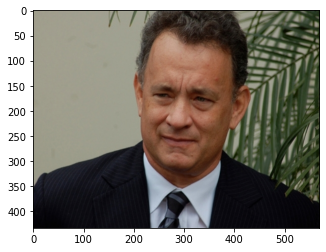

In [23]:
img_P = "./img/TomHanksApr09.jpg"
# img_P = "./img/tom-cruise-vanessa-kirby-mission-impossible-fallout-1564649325.bmp"
img = cv2.imread(img_P)    # bgr

fig = plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## YCbCr

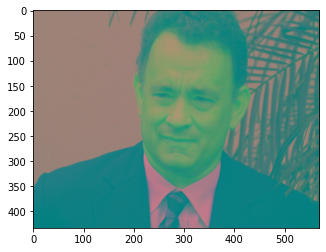

In [24]:
img_YCbCr = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)    #ycbcr

fig = plt.figure()
plt.imshow(img_YCbCr)

## Y Cb Cr

Text(0.5, 1.0, 'Cr')

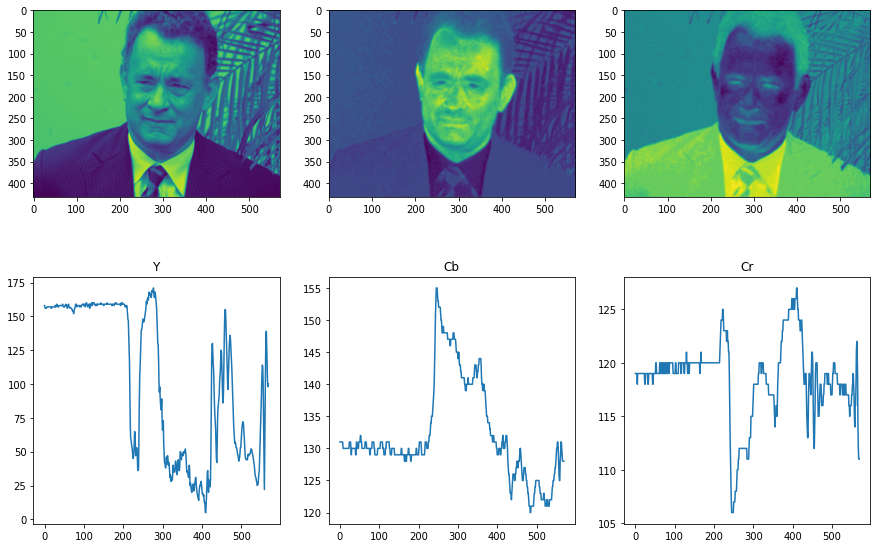

In [36]:
Y, Cb, Cr = img_YCbCr[:, :, 0], img_YCbCr[:, :, 1], img_YCbCr[:, :, 2]
thres = 60


fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0, 0].imshow(Y)
ax[0, 1].imshow(Cb)
ax[0, 2].imshow(Cr)

ax[1, 0].plot(Y[thres, :])
ax[1, 1].plot(Cb[thres, :])
ax[1, 2].plot(Cr[thres, :])

ax[1, 0].set_title('Y')
ax[1, 1].set_title('Cb')
ax[1, 2].set_title('Cr')


## Face list

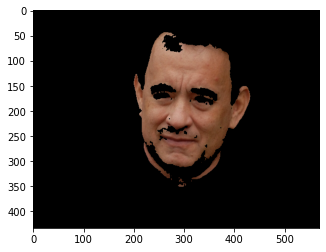

In [38]:
h, w, _ = img_YCbCr.shape

result = _mask_YCbCr(img_YCbCr, 150, 180, 100, 120)
# 65 140 100 140

fig = plt.figure()
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))